In [4]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels as sm
import seaborn as sns
import pylab as pl

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

In [5]:
df = pd.read_csv("../datasets/country_vaccinations.csv")

In [6]:
df.shape

(3396, 15)

In [7]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3396 non-null   object 
 1   iso_code                             3132 non-null   object 
 2   date                                 3396 non-null   object 
 3   total_vaccinations                   2225 non-null   float64
 4   people_vaccinated                    1833 non-null   float64
 5   people_fully_vaccinated              1186 non-null   float64
 6   daily_vaccinations_raw               1861 non-null   float64
 7   daily_vaccinations                   3264 non-null   float64
 8   total_vaccinations_per_hundred       2225 non-null   float64
 9   people_vaccinated_per_hundred        1833 non-null   float64
 10  people_fully_vaccinated_per_hundred  1186 non-null   float64
 11  daily_vaccinations_per_million

In [9]:
df = df.dropna(subset=["iso_code"])

In [10]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.061000e+03,1.669000e+03,1.034000e+03,1.719000e+03,3.004000e+03,2061.000000,1669.000000,1034.000000,3004.000000
mean,1.360520e+06,1.109039e+06,3.887040e+05,6.984704e+04,5.644402e+04,5.290602,4.356836,1.813075,2107.076565
std,4.744984e+06,3.916269e+06,1.390851e+06,2.058974e+05,1.816544e+05,11.046399,8.164375,4.572774,3831.038317
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.535600e+04,2.294400e+04,9.157500e+03,1.611000e+03,1.121000e+03,0.490000,0.490000,0.130000,314.000000
50%,1.563100e+05,1.321050e+05,4.225950e+04,9.146000e+03,5.580500e+03,1.980000,2.030000,0.655000,937.000000
75%,6.769030e+05,5.549240e+05,1.740835e+05,5.370700e+04,2.667000e+04,4.510000,3.390000,1.430000,1690.750000
max,5.628183e+07,4.026801e+07,1.547154e+07,2.242472e+06,1.916190e+06,80.240000,48.270000,31.970000,30869.000000


In [11]:
df["iso_code"].unique()

array(['ALB', 'DZA', 'AND', 'AIA', 'ARG', 'AUT', 'AZE', 'BHR', 'BGD',
       'BEL', 'BMU', 'BOL', 'BRA', 'BGR', 'KHM', 'CAN', 'CYM', 'CHL',
       'CHN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DOM', 'ECU',
       'EGY', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GRL',
       'GGY', 'GUY', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'IMN',
       'ISR', 'ITA', 'JPN', 'JEY', 'KWT', 'LVA', 'LIE', 'LTU', 'LUX',
       'MDV', 'MLT', 'MUS', 'MEX', 'MCO', 'MAR', 'MMR', 'NPL', 'NLD',
       'OWID_NCY', 'NOR', 'OMN', 'PAK', 'PAN', 'PER', 'POL', 'PRT', 'QAT',
       'ROU', 'RUS', 'SHN', 'SAU', 'SRB', 'SYC', 'SGP', 'SVK', 'SVN',
       'ESP', 'LKA', 'SWE', 'CHE', 'TUR', 'TCA', 'ARE', 'GBR', 'USA'],
      dtype=object)

In [12]:
for col in ["country", "vaccines", "source_name", "source_website"]:
    df = df.drop(col, axis=1)

df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)
df = df.set_index(["date"])

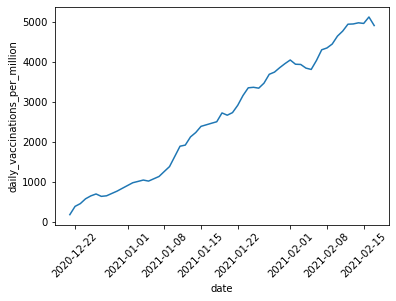

In [13]:
ax = sns.lineplot(x="date", y="daily_vaccinations_per_million", data=df[df["iso_code"] == "USA"])
plt.setp(ax.get_xticklabels(), rotation=45);

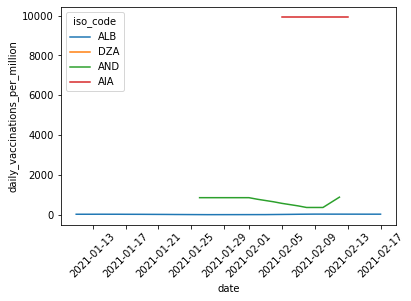

In [14]:
codes = ['ALB', 'DZA', 'AND', 'AIA']
ax = sns.lineplot(x="date", y="daily_vaccinations_per_million", hue="iso_code", data=df[df["iso_code"].isin(codes)])
plt.setp(ax.get_xticklabels(), rotation=45);

In [15]:
df = df.rename(columns = {"daily_vaccinations_per_million": "dvpm"})
for column in df.columns:
    print(f"{column}: {df[column].isnull().values.sum()}")

iso_code: 0
total_vaccinations: 1071
people_vaccinated: 1463
people_fully_vaccinated: 2098
daily_vaccinations_raw: 1413
daily_vaccinations: 128
total_vaccinations_per_hundred: 1071
people_vaccinated_per_hundred: 1463
people_fully_vaccinated_per_hundred: 2098
dvpm: 128


In [16]:
# impute daily vaccinations per million statistic
df["dvpm"] = df.groupby('iso_code')["dvpm"].transform(lambda x: x.interpolate(method="linear"))
df["dvpm"] = df.groupby('iso_code')["dvpm"].transform(lambda x: x.fillna(method="bfill"))
df["dvpm"] = df.groupby('iso_code')["dvpm"].transform(lambda x: x.fillna(method="ffill"))

In [17]:
df.tail()

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,dvpm
date,,,,,,,,,,
2021-02-13,USA,50641884.0,37056122.0,13082172.0,2231326.0,1657703.0,15.14,11.08,3.91,4957.0
2021-02-14,USA,52884356.0,38292270.0,14077440.0,2242472.0,1667631.0,15.81,11.45,4.21,4986.0
2021-02-15,USA,NaN,NaN,NaN,NaN,1662106.0,NaN,NaN,NaN,4970.0
2021-02-16,USA,55220364.0,39670551.0,15015434.0,NaN,1716311.0,16.51,11.86,4.49,5132.0
2021-02-17,USA,56281827.0,40268009.0,15471536.0,1061463.0,1644551.0,16.83,12.04,4.63,4917.0


In [18]:
df[df["dvpm"].isna()]

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,dvpm
date,,,,,,,,,,
2021-01-27,GRL,2584.0,2584.0,NaN,NaN,NaN,4.55,4.55,NaN,NaN
2021-02-03,SHN,107.0,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN


In [19]:
df[df["iso_code"].isin(["GRL", "SHN"])]

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,dvpm
date,,,,,,,,,,
2021-01-27,GRL,2584.0,2584.0,NaN,NaN,NaN,4.55,4.55,NaN,NaN
2021-02-03,SHN,107.0,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN


In [20]:
# remove the two NA rows and we are now good to go with our analysis!
df = df[~df["dvpm"].isna()]

In [29]:
# various statistics for vaccinations in the US
usa = df[df["iso_code"] == "USA"]["dvpm"]
rolmean = usa.rolling(window=5).mean()
rolstd = usa.rolling(window=5).std()

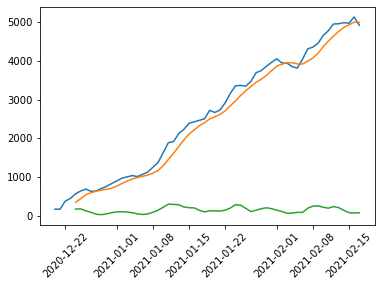

In [37]:
plt.plot(usa)
plt.plot(rolmean)
plt.plot(rolstd)
plt.xticks(rotation = 45);

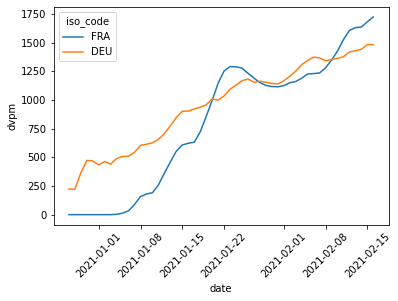

In [170]:
ax = sns.lineplot(x="date", y="dvpm", hue="iso_code", data=df[df["iso_code"].isin(["FRA", "DEU"])])
plt.setp(ax.get_xticklabels(), rotation=45);

In [46]:
def test_station(data):
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
print(test_station(usa))
# time series is not stationary, can we make it so?

Test Statistic                 -0.406965
p-value                         0.908929
# Lags Used                     0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


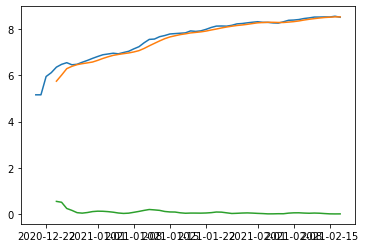

In [47]:
logmean = np.log(usa).rolling(window=5).mean()
logstd = np.log(usa).rolling(window=5).std()

plt.plot(np.log(usa))
plt.plot(logmean)
plt.plot(logstd)

In [48]:
test_station(np.log(usa)) # the data is stationary now!

Test Statistic                 -5.137758
p-value                         0.000012
# Lags Used                     1.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64

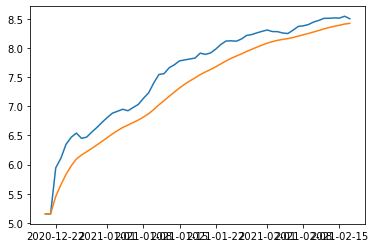

In [51]:
# in case it wasn't, I'd try another transformation such as exponential decay
exp_de = np.log(usa).ewm(halflife=5, min_periods=0, adjust=True).mean()
plt.plot(np.log(usa))
plt.plot(exp_de)

Test Statistic                 -4.153211
p-value                         0.000790
# Lags Used                    11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


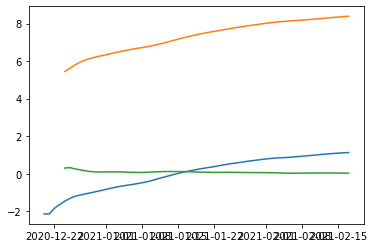

In [54]:
expmean = exp_de.rolling(window=5).mean()
expstd = exp_de.rolling(window=5).std()

plt.plot(exp_de - exp_de.mean())
plt.plot(expmean)
plt.plot(expstd)

print(test_station(exp_de))

In [69]:
log_usa = np.log(usa)
shifted = (log_usa - np.log(usa).shift()).dropna()
test_station(shifted) # timeshift also gives us good results.

Test Statistic                -6.209651e+00
p-value                        5.547663e-08
# Lags Used                    0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64

0.8659061761152309


/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


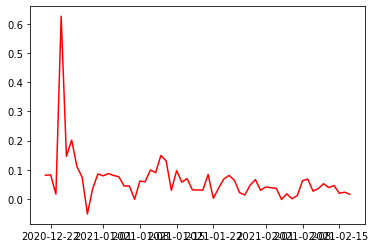

In [73]:
model = ARIMA(log_usa, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(results_AR.fittedvalues, color='red')
print(np.sum((results_AR.fittedvalues - shifted)**2))

/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


0.7308368754013392


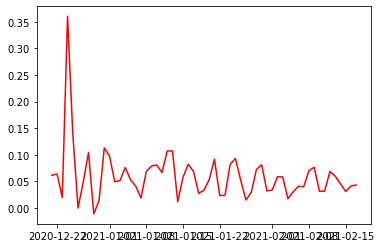

In [74]:
model = ARIMA(log_usa, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(results_MA.fittedvalues, color='red')
print(np.sum((results_MA.fittedvalues - shifted)**2))

model = ARIMA(np.log(usa), (2, 1, 2))
results_ARIMA = model.fit()
plt.plot(results.fittedvalues)
print(np.sum((results_ARIMA.fittedvalues - shifted)**2))

/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

9053238.393146368

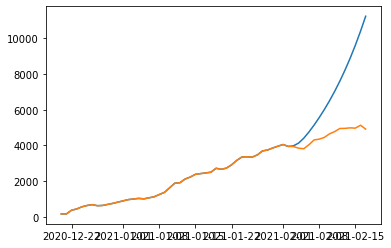

In [119]:
# now that we know the model works let's see how accurate it is
model = ARIMA(log_usa[:-15], (2, 1, 2))
results = model.fit()

start = log_usa.index[-15].to_datetime64()
end = log_usa.index[-1].to_datetime64()
predicted = results.predict(start, end, typ="levels")

comb = usa[:-15].append(np.exp(predicted))
plt.plot(comb)
plt.plot(usa)
mse(np.exp(predicted), np.exp(log_usa[-15:]))

# keeping the data log-transformed seemed to be a mistake here; how about if we try without the transformation?

/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

25842.15948544368

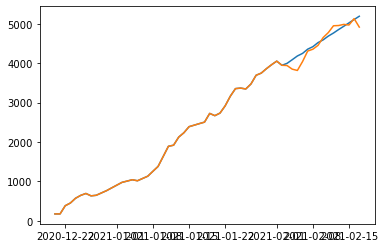

In [143]:
from sklearn.metrics import mean_squared_error as mse

model = ARIMA(usa[:-15], (2, 1, 2))
results = model.fit()

start = usa.index[-15].to_datetime64()
end = usa.index[-1].to_datetime64()
predicted = results.predict(start, end, typ="levels")

comb = usa[:-15].append(predicted)
plt.plot(comb)
plt.plot(usa)

mse(predicted, usa[-15:])

/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

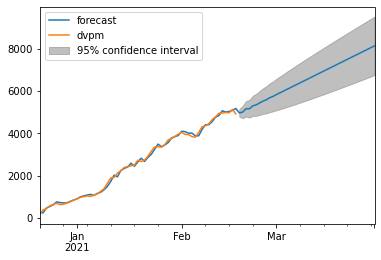

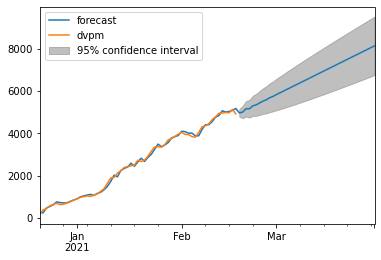

In [154]:
model = ARIMA(usa, (2, 1, 2))
results = model.fit()

from datetime import timedelta

results.plot_predict(1, 100)

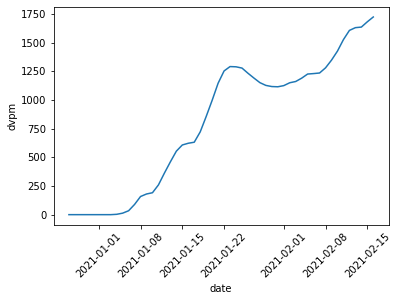

In [155]:
# for vaccinations in France, how related are vaccination levels to those from a few days ago?

ax = sns.lineplot(x="date", y="dvpm", data=df[df["iso_code"] == "FRA"])
plt.setp(ax.get_xticklabels(), rotation=45);

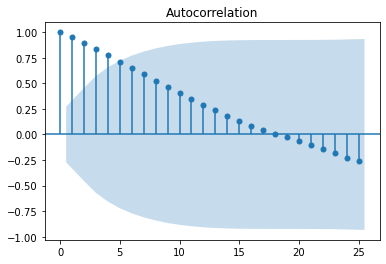

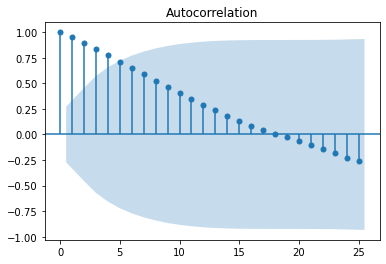

In [164]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fra = df[df["iso_code"] == "FRA"]["dvpm"]
plot_acf(fra, lags=25)

# not very statistically significant.

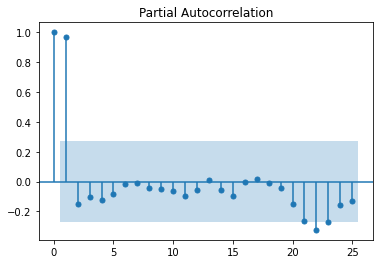

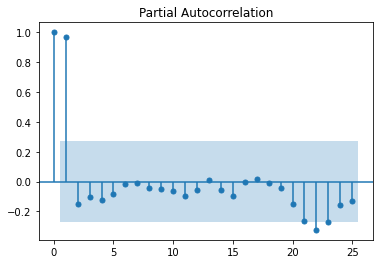

In [165]:
# how about partial autocorrelation?
plot_pacf(fra, lags=25)